# Numpy 세션 과제(0104)

In [ ]:
import numpy as np

In [ ]:
!pip3 install image

In [ ]:
!pip3 install pillow

In [ ]:
!pip install matplotlib

## image, pillow, matplotlib가 무엇일까요?
자세한 내용은 **시각화 세션에서 다루겠지만** 간단하게 말씀드리자면 이미지 파일을 받아와서 처리할 수 있게 해주는 library라고 보시면 됩니다.!<br>
과제할때는 자세한 내용까지 아실 필요 없습니다.<br>
<strong>단지 이미지 파일을 ndarray형식으로 ★☆픽셀단위☆★로 받아왔다는 정도만 이해해주시면 됩니다.</strong>

In [ ]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

# Read image
im = pilimg.open( "./homework.JPG" )

 
# Fetch image pixel data to numpy array
pix = np.array(im)



------------------------------------------------------------------------
위에는 그냥 준비과정이니까 아실 필요 없습니다.<br>
중요한 것은 해당 이미지 파일을 pix (픽셀단위 ndarray)라는 변수에 담아왔다 정도만 알면 됩니다.

## 본 과제 : 
상기 pix 변수를 잘 지지고 볶아보겠습니다.
<br>
+중간 중간에 내가 조작하고 있는 픽셀들을 **이미지로 확인**하고 싶다면<br>
plt.imshow(pix)<br>
라는 함수를 이용하시면 됩니다. ndarray를 다른 변수에 넣으신 경우 pix대신 해당 변수명을 넣으시면 됩니다.

In [ ]:
pix

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
pix.shape

(147, 199, 3)

In [ ]:
np.max(pix)

255

In [ ]:
np.min(pix)

9

우선 shape에서 147이 행(세로) 199이 열(가로) 길이이고 3은 RGB인 것을 확인할 수 있습니다.<br>
그리고 data의 숫자 9~255는 각 RGB별 세기를 말하고 있겠네요.!

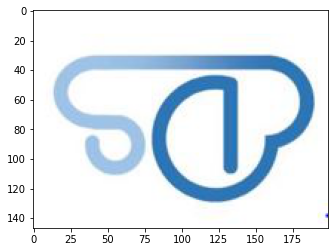

In [ ]:
plt.imshow(pix)

# 시작합니다.

## 사진의 행과 열(가로, 세로)을 transpose 하고 싶습니다. RGB(색)를 건들지 않고 해주세요


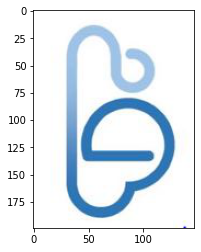

In [ ]:
pix = np.swapaxes(pix, 0, 1) # axis 개념 복습하기..
plt.imshow(pix)

# You could also use "np.transpose(pix, (1,0,2))" 

plt.imshow(pix)를 했을때 다음과 같은 사진이 나오면 됩니다.
![image.png](attachment:image.png)

## 우측 하단의 점이 조금 맘에 안드네요..! 세로 길이를 조금만 줄여볼까요?
193개의 세로 픽셀만 남겨놓읍시다.<br>
hint : slicing( :193) <br>

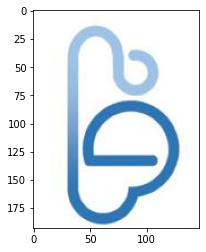

In [ ]:
pix = pix[:193, :, :]
plt.imshow(pix)

plt.imshow(pix)를 했을때 다음과 같은 사진이 나오면 됩니다.
![image.png](attachment:image.png)

## 밑의 부분이 좀 많이 짤려서 허전하죠?.. 흰색으로 붙여봅시다!
1. np.ones()를 이용해 shape가 (10,147,3)이고 데이터 타입은 pix와 같은(dtype을 통하면 알겠죠?) ndarray를 만듭니다.
2. 1에서 구한 변수를 산술 연산을 통해 내부 데이터 값을 모두 255로 만듭시다. 
3. 세로 병합 연산을 통해 pix랑 잘 붙여주세요.
* 보색관계에 의하면 RGB가 모두 255이면 하양, 0이면 검정이니까 데이터 값이 모두 255인 ndarray를 만드는 겁니다.



In [ ]:
print(pix.dtype)

uint8


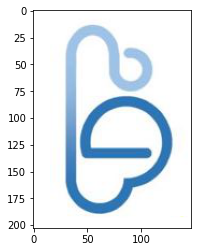

In [ ]:
white_pix = np.ones(shape=(10,147,3), dtype=np.uint8)

white_pix = white_pix * 255

pix = np.vstack([pix, white_pix])

plt.imshow(pix)

# pix = np.concatenate([pix, white_pix], axis=0] is also considerable.

plt.imshow(pix)를 했을때 다음과 같은 사진이 나오면 됩니다.
![image.png](attachment:image.png)

## pix를 흑백 화면으로 만들기

### pix를 한번 rgb 단위로 한번 쪼개볼까요?
axis0에 대해 rgb 순서대로 각각 **pix_r, pix_g, pix_b** 라는 변수에 넣어주시면 되겠습니다 <br>
세변수 모두 shape가 (203, 147)인 이차원 배열(ndarray)이여야 합니다

In [ ]:
pix_r = pix[:, :, [0]].reshape(203,147)
pix_g = pix[:, :, [1]].reshape(203,147)
pix_b = pix[:, :, [2]].reshape(203,147)

pix_r.shape

(203, 147)

### pix_r, pix_g, pix_b를 같게 만들어 보자!
회색, 흑백, 흰색이 되려면 rgb 값이 모두 같아야 합니다.<br>
pix_r, pix_g, pix_b를 평균 내서 **pix_g**라는 변수에 넣어주세요!

In [ ]:
pix_g = (pix_r/3) + (pix_g/3) + (pix_b/3) #왜 (pix_r+pix_g+pix_b)/3으로 하면 안되지? 255가 max라서?
pix_g.shape

(203, 147)

### imshow 함수는 삼차원 변수를 필요로 합니다. 방금 구한 pix_g를 각각 모두 RGB 값으로 갖는 변수를 만들어주세요
해당 array를 만든다음에 pix_g에 다시 저장해주세요<br>
즉 pix_g.shape 가 (203,147,3)이여야 합니다.<br>
hint : 차원 추가, concatenate

In [ ]:
pix_r = pix_g[:, :, np.newaxis]
pix_b = pix_g[:, :, np.newaxis]
pix_g = pix_g[:, :, np.newaxis]

print(pix_g.shape)

pix_g = np.concatenate((pix_r, pix_g, pix_b), axis=2)
#since you are using the same pix_g, why not try..
# pix_g = np.exapnd_dims(pix_g, axis=-1)
# pix_g = np.concatenate((pix_g,pix_g,pix_g), axis=2)

print(pix_g.shape)

(203, 147, 1)
(203, 147, 3)


### pix_g를 만들면서 나눗셈을 했는데 소수점이 남으면 float 자료형이겠죠? 반올림 후 int로 바꿔줍시다.
1. pix_g data의 자료형 체크 (dtype)
2. round를 통해 반올림
3. astype을 통해 int형으로 변환

최종 결과물은 pix_g 변수에 저장

float64
int64


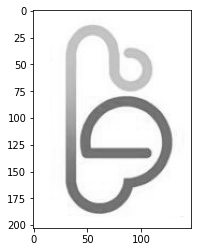

In [ ]:
print(pix_g.dtype)

pix_g = np.round_(pix_g, 0)

pix_g = pix_g.astype(int)

print(pix_g.dtype)

plt.imshow(pix_g)

plt.imshow(pix_g)를 했을때 다음과 같은 사진이 나오면 됩니다.
![image.png](attachment:image.png)

### 마지막으로 색반전을 해봅시다.
pixel 값들이 0~255 이니 127.5를 기준으로 대칭해주면 되겠네요 :)<br>
쉬운 연산이니 맡기겠습니다.

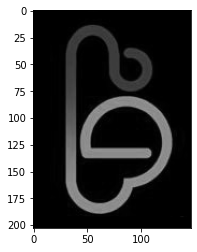

In [ ]:
pix_g = 255 - pix_g
plt.imshow(pix_g)

plt.imshow(pix_g)를 했을때 다음과 같은 사진이 나오면 됩니다.
![image.png](attachment:image.png)

## 추가과제(선택사항) : 저 흑백 DSL을 정방향으로 만들어주세요

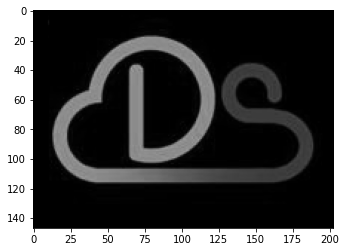

In [ ]:
pix_g = pix_g[:, ::-1, :]
pix_g = np.swapaxes(pix_g, 0, 1)
pix_g = pix_g[:, ::-1, :]
plt.imshow(pix_g)

# 고생하셨습니다 :) 하시다가 궁금한거 있으시면 익명 톡방 애용 부탁드립니다